## **Importing Dependencies and Modules**

In [0]:
import numpy as np
import os
import random
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
import tensorflow as tf

### **Downloading Caltech-101 dataset**

In [0]:
!echo "Downloading 101_Object_Categories for image notebooks"
!curl -L -o 101_ObjectCategories.tar.gz --progress-bar http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz
!tar -xzf 101_ObjectCategories.tar.gz
!rm 101_ObjectCategories.tar.gz
!ls


######################################################################## 100.0%
101_ObjectCategories  sample_data


In [0]:
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x
root = '101_ObjectCategories'
exclude = ['BACKGROUND_Google', 'Motorbikes', 'airplanes', 'Faces_easy', 'Faces']
train_split, val_split = 0.6, 0.15

categories = [x[0] for x in os.walk(root) if x[0]][1:]
categories = [c for c in categories if c not in [os.path.join(root, e) for e in exclude]]

print(categories)

['101_ObjectCategories/binocular', '101_ObjectCategories/grand_piano', '101_ObjectCategories/ibis', '101_ObjectCategories/minaret', '101_ObjectCategories/platypus', '101_ObjectCategories/rhino', '101_ObjectCategories/yin_yang', '101_ObjectCategories/llama', '101_ObjectCategories/anchor', '101_ObjectCategories/scorpion', '101_ObjectCategories/flamingo', '101_ObjectCategories/cougar_face', '101_ObjectCategories/beaver', '101_ObjectCategories/wild_cat', '101_ObjectCategories/saxophone', '101_ObjectCategories/revolver', '101_ObjectCategories/electric_guitar', '101_ObjectCategories/elephant', '101_ObjectCategories/inline_skate', '101_ObjectCategories/dollar_bill', '101_ObjectCategories/lamp', '101_ObjectCategories/brain', '101_ObjectCategories/joshua_tree', '101_ObjectCategories/hedgehog', '101_ObjectCategories/ceiling_fan', '101_ObjectCategories/starfish', '101_ObjectCategories/soccer_ball', '101_ObjectCategories/metronome', '101_ObjectCategories/watch', '101_ObjectCategories/ketch', '101_

In [0]:
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames 
              in os.walk(category) for f in filenames 
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})

# count the number of classes
num_classes = len(categories)

In [0]:
random.shuffle(data)
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[65, 52, 6, 56, 92, 15, 57, 34, 53, 49, 28, 21, 42, 71, 35, 24, 18, 63, 36, 30, 53, 54, 21, 92, 18, 50, 91, 86, 73, 29, 17, 70, 28, 40, 28, 67, 20, 85, 7, 33, 7, 93, 78, 14, 62, 69, 27, 70, 95, 30, 62, 35, 62, 84, 8, 93, 40, 93, 57, 28, 20, 20, 57, 82, 67, 7, 10, 71, 25, 3, 64, 38, 37, 35, 21, 69, 19, 51, 70, 53, 19, 55, 53, 65, 30, 19, 39, 39, 14, 73, 38, 20, 7, 35, 26, 65, 33, 62, 69, 93, 80, 91, 67, 25, 58, 25, 65, 28, 64, 81, 54, 72, 28, 27, 74, 91, 94, 72, 48, 38, 81, 65, 91, 94, 47, 38, 12, 28, 95, 80, 3, 52, 80, 67, 21, 62, 53, 27, 90, 22, 41, 43, 92, 29, 60, 13, 2, 48, 65, 5, 36, 1, 89, 65, 32, 84, 15, 10, 59, 42, 89, 87, 24, 67, 25, 21, 69, 64, 35, 46, 52, 28, 87, 78, 72, 78, 33, 13, 39, 19, 41, 42, 91, 48, 23, 73, 50, 39, 35, 50, 57, 91, 12, 67, 62, 53, 29, 78, 52, 62, 35, 9, 70, 72, 10, 11, 15, 57, 31, 84, 72, 57, 28, 72, 47, 80, 73, 46, 62, 62, 13, 83, 34, 96, 82, 30, 88, 86, 25, 15, 85, 23, 1, 33, 33, 52, 82, 26, 0, 80, 38, 23, 45, 62, 46, 28, 29, 30, 73, 71, 25, 57, 84, 2

In [0]:
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(1553, 97)


In [0]:
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)

finished loading 6209 images from 97 categories
train / validation / test split: 3725, 931, 1553
training data shape:  (3725, 224, 224, 3)
training labels shape:  (3725, 97)


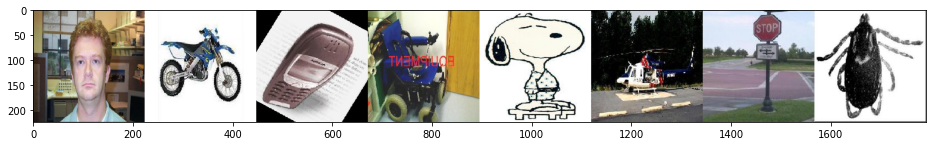

In [0]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

## **Task 1-CNN from Scratch**

In [0]:
def Task1(flag=0):
    mod=Sequential()
    mod.add(Conv2D(32, (7, 7), input_shape=x_train.shape[1:],activation='relu'))
    mod.add(MaxPooling2D(pool_size=(3, 3)))
    if flag:
        mod.add(Dropout(0.2))
    mod.add(Conv2D(32, (5, 5), input_shape=x_train.shape[1:],activation='relu'))
    mod.add(MaxPooling2D(pool_size=(3, 3)))
    if flag:
        mod.add(Dropout(0.3))
    mod.add(Flatten())
    mod.add(Dense(256,activation='relu'))
  #mod.add(Dense(256,activation='relu'))
    if flag:
        mod.add(Dropout(0.3))
    mod.add(Dense(num_classes,activation='softmax'))
    return(mod)
def mod_compile(model):
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    hist=model.fit(x_train, y_train,batch_size=64,epochs=15,validation_data=(x_val, y_val))
    return(hist)

### **Implementation of CNN without Dropout**

In [0]:
model=Task1(0)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 218, 218, 32)      4736      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 68, 68, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               3965184   
_________________________________________________________________
dense_2 (Dense)              (None, 97)               

In [0]:
res=mod_compile(model)

Train on 3725 samples, validate on 931 samples
Epoch 1/15
3725/3725 [==============================] - 4s 1ms/step - loss: 4.2384 - accuracy: 0.1165 - val_loss: 3.7736 - val_accuracy: 0.2095
Epoch 2/15
3725/3725 [==============================] - 4s 1ms/step - loss: 2.9574 - accuracy: 0.3289 - val_loss: 3.0782 - val_accuracy: 0.3394
Epoch 3/15
3725/3725 [==============================] - 4s 1ms/step - loss: 1.6207 - accuracy: 0.6000 - val_loss: 3.0667 - val_accuracy: 0.3620
Epoch 4/15
3725/3725 [==============================] - 4s 1ms/step - loss: 0.6033 - accuracy: 0.8486 - val_loss: 3.6907 - val_accuracy: 0.3620
Epoch 5/15
3725/3725 [==============================] - 4s 1000us/step - loss: 0.1981 - accuracy: 0.9479 - val_loss: 4.4178 - val_accuracy: 0.3759
Epoch 6/15
3725/3725 [==============================] - 4s 1ms/step - loss: 0.0964 - accuracy: 0.9783 - val_loss: 4.6477 - val_accuracy: 0.3856
Epoch 7/15
3725/3725 [==============================] - 4s 1ms/step - loss: 0.0353 - a

### **Implementation of CNN with Dropout**

In [0]:
model2=Task1(1)
model2.summary()
#mod_compile(model)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 218, 218, 32)      4736      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 72, 72, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 68, 68, 32)        25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 15488)            

In [0]:
res2=mod_compile(model2)

Train on 3725 samples, validate on 931 samples
Epoch 1/15
3725/3725 [==============================] - 4s 1ms/step - loss: 4.4610 - accuracy: 0.0609 - val_loss: 4.2043 - val_accuracy: 0.1289
Epoch 2/15
3725/3725 [==============================] - 4s 1ms/step - loss: 4.0052 - accuracy: 0.1501 - val_loss: 3.8036 - val_accuracy: 0.1901
Epoch 3/15
3725/3725 [==============================] - 4s 1ms/step - loss: 3.5183 - accuracy: 0.2298 - val_loss: 3.4160 - val_accuracy: 0.2535
Epoch 4/15
3725/3725 [==============================] - 4s 1ms/step - loss: 2.9853 - accuracy: 0.3176 - val_loss: 3.1805 - val_accuracy: 0.3330
Epoch 5/15
3725/3725 [==============================] - 4s 1ms/step - loss: 2.4141 - accuracy: 0.4180 - val_loss: 3.1724 - val_accuracy: 0.3276
Epoch 6/15
3725/3725 [==============================] - 4s 1ms/step - loss: 1.9628 - accuracy: 0.5077 - val_loss: 3.0572 - val_accuracy: 0.3555
Epoch 7/15
3725/3725 [==============================] - 4s 1ms/step - loss: 1.5708 - accu

### **Model Evaluation of Task 1:Comparision of CNN model with and without Dropout Layers**

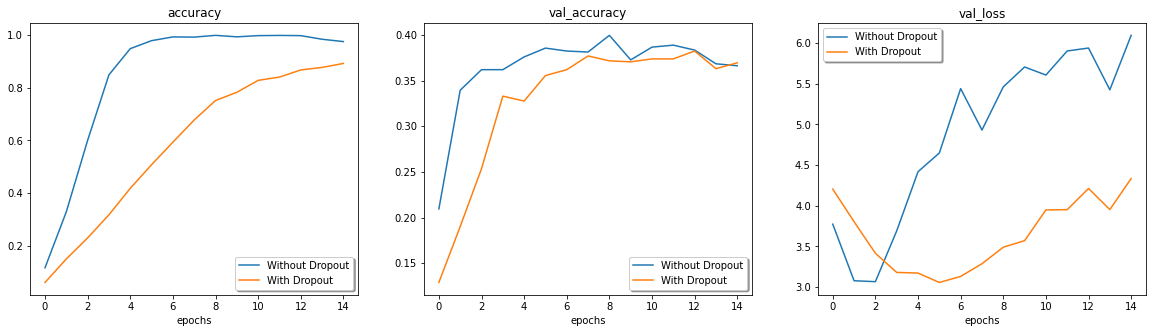

In [0]:
fig,sub=plt.subplots(1,3,figsize=(20,5))
title=["accuracy","val_accuracy","val_loss"]
for i in range(3):
    sub[i].set_title(title[i])
    sub[i].set_xlabel("epochs")
    a=sub[i].plot(res.history[title[i]])
    b=sub[i].plot(res2.history[title[i]])
    if i==2:
        sub[i].legend(('Without Dropout', 'With Dropout'), loc='upper left', shadow=True)
    else:  
        sub[i].legend(('Without Dropout', 'With Dropout'), loc='lower right', shadow=True)
#sub[1].plot(res.history["val_accuracy"])
#sub[1].plot(res.history["val_accuracy"])
#sub[2].plot(res.history["loss"])
#sub[2].plot(res.history["val_loss"])
plt.show()

### **Results and Discussions**:


* From the above results it is evident that the accuracy of training data set of model with Dropouts is lower than the model without Dropouts.
* It is clear from results that model(without dropouts) is clearlly overfitting the training data. There is lot of difference between training accuracy and validation accuracy.


* Conclusion:  Model(with Dropouts) is a better model than model(without Dropouts). The following points support our Conclusion


1.   There isnt much difference in validation accuracy between Model(with Dropouts) and Model(without Dropouts)
2.   There isnt much difference in training accuracy between Model(with Dropouts) and Model(without Dropouts)
3.   Validation loss of Model(with Dropouts) is lower than Model(without Dropouts).









With Dropout

In [0]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 3.089871020787775
Test accuracy: 0.32188841700553894


Without Dropout

In [0]:
loss, accuracy = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 3.874053463915387
Test accuracy: 0.3959227502346039


## **Task 2: Transfer Learning of Pretrained Model:ResNet-50**

In [0]:
class Model2(tf.keras.Model):
    def __init__(self):
        super(Model2, self).__init__()
        self.base_model=tf.keras.applications.ResNet50V2(weights='imagenet',include_top=True,input_shape=(224, 224, 3))
        #self.base_model.summary()
        self.flat=tf.keras.layers.Flatten()
        self.dense1=tf.keras.layers.Dense(128,activation='relu')
        self.dense2=tf.keras.layers.Dense(97,activation='softmax')
        self.unfreeze=1
        for i in self.base_model.layers:
            i.trainable=False
    def model_train(self):
        print(self.base_model.layers[-2].output)
        x=self.flat(self.base_model.layers[-2].output)
        y=self.dense1(x)
        out=self.dense2(y)
        #print(out)
        model=tf.keras.Model(self.base_model.layers[0].input,out)
        for i in model.layers[-(self.unfreeze)-2:-3]:
            i.trainable=True
            print(i.output)
        model.summary()
        model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
        result=model.fit(x_train, np.array(y_train,dtype='float32'),batch_size=64,epochs=15,validation_data=(x_val, np.array(y_val,dtype='float32')))
        return(model,result)

### **Freezing Last layer of Resnet-50:"avg_pool_5/Identity:0"**

In [0]:
model=Model2()
model_v1,res_v1=model.model_train()

Tensor("avg_pool_5/Identity:0", shape=(None, 2048), dtype=float32)
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________

### **UnFreezing Last two layers-"avg_pool_6/Identity:0" &"post_bn_6/Identity:0"(batch normalisation)**

In [0]:
model=Model2()
model.unfreeze=4
model_v2,res_v2=model.model_train()

Tensor("avg_pool_6/Identity:0", shape=(None, 2048), dtype=float32)
Tensor("post_bn_6/Identity:0", shape=(None, 7, 7, 2048), dtype=float32)
Tensor("post_relu_6/Identity:0", shape=(None, 7, 7, 2048), dtype=float32)
Tensor("avg_pool_6/Identity:0", shape=(None, 2048), dtype=float32)
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________

## **Model Evaluation of Task 2:**

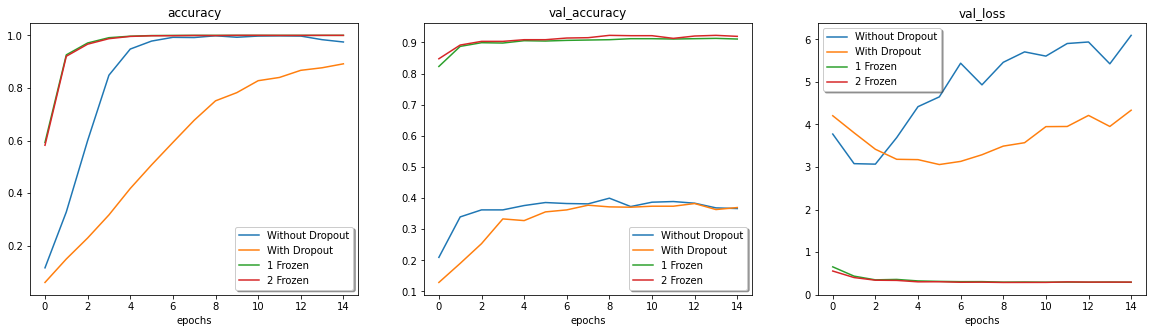

In [0]:
fig,sub=plt.subplots(1,3,figsize=(20,5))
title=["accuracy","val_accuracy","val_loss"]
for i in range(3):
    sub[i].set_title(title[i])
    sub[i].set_xlabel("epochs")
    sub[i].plot(res.history[title[i]])
    sub[i].plot(res2.history[title[i]])
    sub[i].plot(res_v1.history[title[i]])
    sub[i].plot(res_v2.history[title[i]])
    if i==2:
        sub[i].legend(('Without Dropout', 'With Dropout','1 Frozen', '2 Frozen'), loc='upper left', shadow=True)
    else:  
        sub[i].legend(('Without Dropout', 'With Dropout','1 Frozen', '2 Frozen'), loc='lower right', shadow=True)

### Note: 
1 Frozen- means that model trained by freezing all layers except the last one.

2 Frozen-means that model trained by freezing all layers except the last two.

### **Results and Discussions**:


*   The pretrained network(resnet) is a better model compared to our trained CNN model of Task1. The pretrained network(resnet) achieves saturation point at lower epochs than model of Task1.
*   Similarly validation accuracy and validation loss of resnet model is far better than that of cnn model of task 1.

Conclusion: Pretrained network resnet with unfreezing 2 layers is a bit better than Pretrained network resnet with unfreezing 1 layer.(though the differences are negligible)


1.   Though the training accuracy of model with 1 trained layers and 2 trained layers is same, the validation accuracy of the latter model(2 trained layers) is better than the former model(1 trained layer).
2.   The validation loss of the  model(2 trained layers) is lower than the  model(1 trained layer).
3.   So From the above results it is clear that with the increase of trainable paramters we get a better model.









## **Task 3- Data Augmentation to Resnet 50**

In Task 3 I have implemented two different models:


*   Model1- Rotation data augmentation technique only
*   Model2- Height Shift+ Zoom+Rotation+Vertical Flip data augmentation techniques are used



In [0]:
class Task3(tf.keras.Model):
    def __init__(self):
        super(Task3, self).__init__()
        self.base_model=tf.keras.applications.ResNet50V2(weights='imagenet',include_top=True,input_shape=(224, 224, 3))
        #self.base_model.summary()
        self.flat=tf.keras.layers.Flatten()
        self.dense1=tf.keras.layers.Dense(128,activation='relu')
        self.dense2=tf.keras.layers.Dense(97,activation='softmax')
        self.unfreeze=1
        for i in self.base_model.layers:
            i.trainable=False
    def rotate(self,x_train):
        datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=40)
        datagen.fit(x_train)
        return(datagen)
    def mutate(self,x_train):
        datagen = tf.keras.preprocessing.image.ImageDataGenerator(height_shift_range=0.2,vertical_flip=True,rotation_range=40,zoom_range=0.2)
        datagen.fit(x_train)
        return(datagen)
    def model_build(self):
        x=self.flat(self.base_model.layers[-2].output)
        y=self.dense1(x)
        out=self.dense2(y)
        print(out)
        model=tf.keras.Model(self.base_model.layers[0].input,out)
        #model.summary()
        model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])    
        return(model)

In [0]:
obj=Task3()
model=obj.model_build()
model.summary()

Tensor("dense_9/Identity:0", shape=(None, 97), dtype=float32)
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________

### **Model Building by Rotation Data Augmentation Technique**

Reason "why I used Rotation?" : By rotating the image to a certain degree(in my model-40 degrees) we do not change core contextual and background features of the image. Only some noise is imparted on the training image.   

In [0]:
rotate_gen=obj.rotate(x_train)
stats1=model.fit(rotate_gen.flow(x_train, y_train, batch_size=64,shuffle=False),epochs=15,validation_data=(x_val, np.array(y_val,dtype='float32')))

Epoch 1/15
59/59 [==============================] - 37s 635ms/step - loss: 2.3975 - accuracy: 0.4910 - val_loss: 0.7616 - val_accuracy: 0.8056
Epoch 2/15
59/59 [==============================] - 37s 634ms/step - loss: 0.6275 - accuracy: 0.8397 - val_loss: 0.4935 - val_accuracy: 0.8657
Epoch 3/15
59/59 [==============================] - 38s 641ms/step - loss: 0.3786 - accuracy: 0.8985 - val_loss: 0.4616 - val_accuracy: 0.8711
Epoch 4/15
59/59 [==============================] - 38s 643ms/step - loss: 0.2704 - accuracy: 0.9211 - val_loss: 0.4011 - val_accuracy: 0.8829
Epoch 5/15
59/59 [==============================] - 37s 634ms/step - loss: 0.1970 - accuracy: 0.9468 - val_loss: 0.3795 - val_accuracy: 0.8904
Epoch 6/15
59/59 [==============================] - 37s 629ms/step - loss: 0.1569 - accuracy: 0.9573 - val_loss: 0.3877 - val_accuracy: 0.8776
Epoch 7/15
59/59 [==============================] - 37s 626ms/step - loss: 0.1086 - accuracy: 0.9734 - val_loss: 0.3615 - val_accuracy: 0.8990

### **Model building by Multiple Data Augmentation Technique:(Height Shift+ Zoom+Rotation+Vertical Flip)**

Reason "why I used multiple data Augmentation techniques?" : By performing following operations: Height shift,Zooming, Rotation, Vertical Flip, we impart more noise to the training data(than simple rotation) and prevents the model to overfit. 

In [0]:
#Horizontal shift
obj=Task3()
model=obj.model_build()
mutate_gen=obj.mutate(x_train)
stats2=model.fit(mutate_gen.flow(x_train, y_train, batch_size=32,shuffle=False),epochs=15,validation_data=(x_val, np.array(y_val,dtype='float32')))

Tensor("dense_15/Identity:0", shape=(None, 97), dtype=float32)
Epoch 1/15
117/117 [==============================] - 41s 346ms/step - loss: 2.3890 - accuracy: 0.4776 - val_loss: 0.7993 - val_accuracy: 0.7905
Epoch 2/15
117/117 [==============================] - 40s 338ms/step - loss: 0.8783 - accuracy: 0.7576 - val_loss: 0.5287 - val_accuracy: 0.8539
Epoch 3/15
117/117 [==============================] - 39s 334ms/step - loss: 0.6331 - accuracy: 0.8196 - val_loss: 0.5121 - val_accuracy: 0.8443
Epoch 4/15
117/117 [==============================] - 39s 329ms/step - loss: 0.5150 - accuracy: 0.8523 - val_loss: 0.5151 - val_accuracy: 0.8550
Epoch 5/15
117/117 [==============================] - 38s 328ms/step - loss: 0.4526 - accuracy: 0.8690 - val_loss: 0.4585 - val_accuracy: 0.8614
Epoch 6/15
117/117 [==============================] - 38s 325ms/step - loss: 0.3659 - accuracy: 0.8862 - val_loss: 0.4849 - val_accuracy: 0.8571
Epoch 7/15
117/117 [==============================] - 38s 324ms/ste

### **Model Evaluation for Task3:**

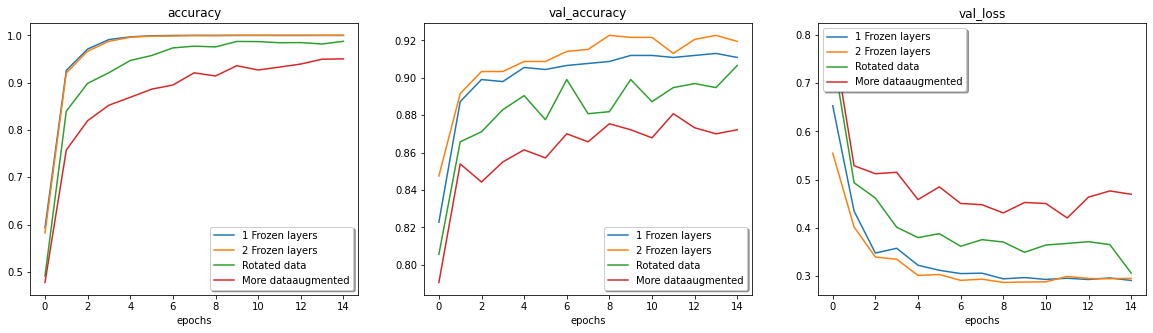

In [0]:
fig,sub=plt.subplots(1,3,figsize=(20,5))
title=["accuracy","val_accuracy","val_loss"]
for i in range(3):
    sub[i].set_title(title[i])
    sub[i].set_xlabel("epochs")
    sub[i].plot(res_v1.history[title[i]])
    sub[i].plot(res_v2.history[title[i]])
    sub[i].plot(stats1.history[title[i]])
    sub[i].plot(stats2.history[title[i]])
    if i==2:
        sub[i].legend(('1 Frozen layers', '2 Frozen layers','Rotated data','More dataaugmented'), loc='upper left', shadow=True)
    else:  
        sub[i].legend(('1 Frozen layers', '2 Frozen layers','Rotated data','More dataaugmented'), loc='lower right', shadow=True)

# **Results and Discussions:**

model 1- rotation
model 2(More data augmented data)-Height Shift+ Zoom+Rotation+Vertical Flip

By data augmentation technique we impart more noise to the training data and thereby reduces the chances of model to generalise the predictions based on training data(i.e stops overfitting).
*   All the stats like "training accuracy" and "validation accuracy", of is higher for model 1 (rotation data augmentation) than model 2.
*   The validation loss of model 2 is higher than model 1.

The above two points prove that model 2 is built on more noisier data than model 1.




## **Test Statistics: Resnet vs Data Augmented Resnet**
More data augmented data- Height Shift+ Zoom+Rotation+Vertical Flip



In [0]:
#model=Model2()
#model.unfreeze=4
l1,acc1=model_v2.evaluate(mutate_gen.flow(x_test, y_test,shuffle=False))
l2,acc2=model.evaluate(mutate_gen.flow(x_test, y_test,shuffle=False))

49/49 [==============================] - 15s 313ms/step - loss: 0.8828 - accuracy: 0.7869


<BarContainer object of 2 artists>

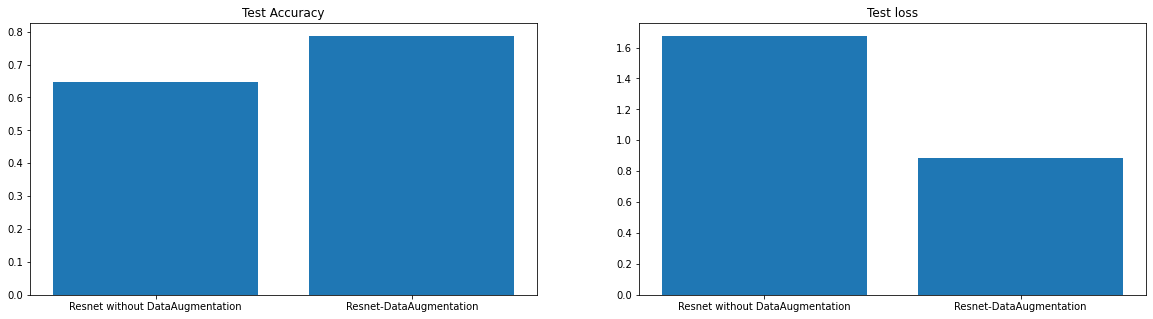

In [0]:
fig,sub=plt.subplots(1,2,figsize=(20,5))
title=["Test Accuracy","Test loss"]

sub[0].set_title(title[0])
sub[0].bar(x=["Resnet without DataAugmentation","Resnet-DataAugmentation"],height=[acc1,acc2])
sub[1].set_title(title[1])
sub[1].bar(x=["Resnet without DataAugmentation","Resnet-DataAugmentation"],height=[l1,l2])

# **Results and Discussions:**

On comparing the test accuracy of model in Task 2 and model in Task3 we can infer that model(Task3) is a better performing model than model(Task2). The following points support our conclusion:



1.   test accuracy of model(Task 3) is higher than that of model(Task 2)
2.   Loss function of model(Task 3) on test data is lower than that of model(Task 2).

The data augmentation seems to be effective in preventing overfitting and reduces the chances of model to generalise based on training session.
